<a href="https://colab.research.google.com/github/roshan-koirala/ceri8211globalgeophysics/blob/master/RK_HW6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**HOMEWORK - 6**

In [0]:
import matplotlib.pyplot as plt
import pandas as pd
from google.colab import drive
import numpy as np

In [2]:
#drive.mount('/content/drive')
drive.mount("/content/drive", force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


**DATA LOADING AND VARIABLE SETTING**

In [0]:
data = pd.read_excel('/content/drive/My Drive/SPRING_2020/Geophysics/HW6/Hasterok-EPSL-2013-Data.xlsx', \
                     header = None, usecols = [0,6,7,8], names = ['Age','Q1', 'Q2', 'Q3'])
age = data['Age']  # Min age i selected for this plotting
Q1 = data['Q1']     # Corrected Q1
Q2 = data['Q2']     # Corrected Q2
Q3 = data['Q3']     # Corrected Q3

# Site Specific age, Q1, Q2 and Q3
age_site = age[4:13]
Median_site = Q2[4:13]
Q3_site = Q3[4:13]
Q1_site = - Q1[4:13]

# Filtered age, Q1, Q2 and Q3
age_fil = age[15:31]
Median_fil = Q2[15:31]
Q3_fil = Q3[15:31]
Q1_fil = - Q1[15:31]

# Unfiltered age, Q1, Q2 and Q3
age_unfil = age[33:79]
Median_unfil = Q2[33:79]
Q3_unfil = Q3[33:79]
Q1_unfil = - Q1[33:79]

**GDH1 Model**

In [0]:
# List of all the ages 
age_all = list(age[4:13]) + list(age[15:31]) + list(age[33:79])

# The function takes the age and computed the heat flow for the given ages
def fct_heat(ag):
  if ag <= 55:
    Q = 510/ag**0.5
  else:
    Q = 48 + 96 * np.exp(-0.0278*ag)
  return Q

GDH1 = []
for i in age_all:
  GDH1.append(fct_heat(i))

**PLOTTING DATA WITHOUT GDH1 MODEL**

([<matplotlib.axis.YTick at 0x7f0a68dcd5f8>,
 <a list of 5 Text major ticklabel objects>)

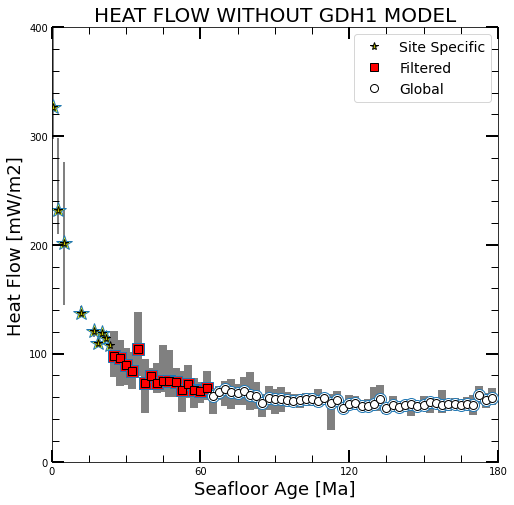

In [5]:
plt.figure(figsize = (8,8))
plt.title('HEAT FLOW WITHOUT GDH1 MODEL', fontsize=20)
plt.plot(age_site, Q2[4:13], 'y*', age_fil, Q2[15:31], 'rs', age_unfil, Q2[33:79], 'wo', markersize=8, markeredgecolor='k', markeredgewidth=1, zorder=4)

plt.errorbar(age_site, Q2[4:13], [Q2[4:13] - Q1[4:13], Q3[4:13]- Q2[4:13]], lw=2, ecolor='gray', \
             fmt='*', markerfacecolor='yellow',  markersize=16, zorder=1)
plt.errorbar(age_fil, Q2[15:31], [Q2[15:31] - Q1[15:31], Q3[15:31]- Q2[15:31]], lw=8, \
             fmt='s', markerfacecolor='red', ecolor='gray', markersize=12, zorder=2)
plt.errorbar(age_unfil, Q2[33:79], [Q2[33:79] - Q1[33:79], Q3[33:79]- Q2[33:79]], lw=8, \
             fmt='o', markerfacecolor='white', ecolor='gray', markersize=12, zorder=3)

plt.legend(["Site Specific", "Filtered", "Global"], fontsize=14)
plt.xlabel('Seafloor Age [Ma]', fontsize=18)
plt.ylabel('Heat Flow [mW/m2]', fontsize=18)
plt.xlim(0, 180)
plt.ylim(0, 400)
plt.minorticks_on()
plt.tick_params(which='major', length=12, width=2, direction='in',bottom = True,top =True , right = True,left = True,)
plt.tick_params(which='minor', length=7, width=1, direction='in',bottom = True,top =True , right = True,left = True)
plt.xticks(np.arange(0,181, 60.0))
plt.yticks(np.arange(0,401, 100.0))


**PLOTTING DATA WITH GDH1 MODEL**

([<matplotlib.axis.YTick at 0x7f0a67a0ef60>,
 <a list of 5 Text major ticklabel objects>)

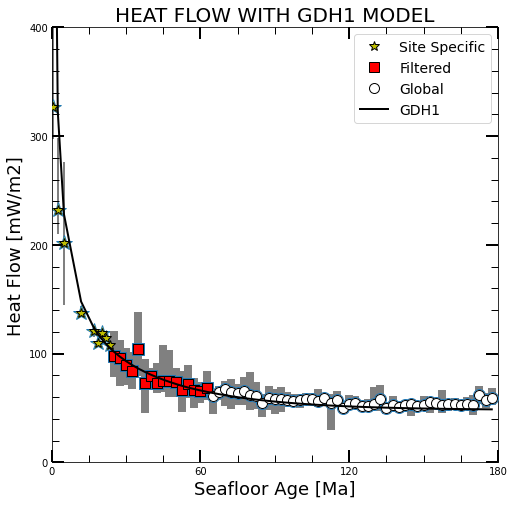

In [6]:
plt.figure(figsize = (8,8))
plt.title('HEAT FLOW WITH GDH1 MODEL', fontsize=20)
plt.plot(age_site, Q2[4:13], 'y*', age_fil, Q2[15:31], 'rs', age_unfil, Q2[33:79], 'wo', markersize=10, markeredgecolor='k', markeredgewidth=1, zorder=4)

plt.errorbar(age_site, Q2[4:13], [Q2[4:13] - Q1[4:13], Q3[4:13]- Q2[4:13]], lw=2, ecolor='gray', \
             fmt='*', markerfacecolor='yellow',  markersize=16, zorder=1)
plt.errorbar(age_fil, Q2[15:31], [Q2[15:31] - Q1[15:31], Q3[15:31]- Q2[15:31]], lw=8, \
             fmt='s', markerfacecolor='red', ecolor='gray', markersize=12, zorder=2)
plt.errorbar(age_unfil, Q2[33:79], [Q2[33:79] - Q1[33:79], Q3[33:79]- Q2[33:79]], lw=8, \
             fmt='o', markerfacecolor='white', ecolor='gray', markersize=12, zorder=3)

plt.plot(age_all, GDH1,'k-', linewidth=2, zorder=5)

plt.xlabel('Seafloor Age [Ma]', fontsize=18)
plt.ylabel('Heat Flow [mW/m2]', fontsize=18)
plt.legend(["Site Specific", "Filtered", "Global", "GDH1"], fontsize=14)
plt.xlim(0, 180)
plt.ylim(0, 400)
plt.minorticks_on()
plt.tick_params(which='major', length=12, width=2, direction='in',bottom = True,top =True , right = True,left = True,)
plt.tick_params(which='minor', length=7, width=1, direction='in',bottom = True,top =True , right = True,left = True)
plt.xticks(np.arange(0,181, 60.0))
plt.yticks(np.arange(0,401, 100.0))
